# Multi Linear Regression -Ecommerce project_business

Problem Statement
A project with an Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They have asked to help them figure it out. 

Dataset Details

We worked with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

•	Avg. Session Length: Average session of in-store style advice sessions in minutes.

•	Time on App: Average time spent on App in minutes

•	Time on Website: Average time spent on Website in minutes

•	Length of Membership: How many years the customer has been a member.

•	Yearly Amount Spent: The total amount the customer is spending in dollars.

Business Objective:  Interpret which variables are contributing towards the more annual income prediction and build a prediction model

Acceptance Criterion:  Need to deploy the end results using Streamlit etc.

Milestones: 30 days to complete the Project

Milestone	Duration 	Task start - End Date 

Kick off and Business Objective discussion	1 day	

EDA	1 Week	
Model Building	1 Week	
Model Evaluation	1 Week 	
Feedback	
1 week	
Deployment		
Final presentation	1 Day	

Protocols:
1)	All participants should adhere to agreed timelines and timelines will not be extended.
2)	All the documentation – Final presentation and python code to be submitted before the final presentation day.
3)	All the participants must attend review meetings.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as smf
import statsmodels.formula.api as sm
import scipy.stats as stats
import scipy.stats as stat

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_all = pd.read_csv(r"Ecommerce_Customers.csv")
print("data Shape:",data_all.shape)
data_all.tail()

data Shape: (500, 8)


,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,"49791 Rachel Heights Apt. 898East Drewborough,...",DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [4]:
data=data_all.iloc[:,3:]
data.tail()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510
499,33.715981,12.418808,35.771016,2.735160,497.778642


### EDA and Data Visualization

In [5]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print('\nNumber of unique duplicates:', len(data[data.duplicated()]));   print(data[data.duplicated()].value_counts())
# duplicate_counts = data[data.duplicated()].value_counts().reset_index(name='Count')['Count']
data=data.drop_duplicates();  print("data Shape:",data.shape)


 Describe:
       Avg Session Length  Time on App  Time on Website  Length of Membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053194    12.052488        37.060445              3.533462   
std              0.992563     0.994216         1.010489              0.999278   
min             29.532429     8.508152        33.913847              0.269901   
25%             32.341822    11.388153        36.349257              2.930450   
50%             33.082008    11.983231        37.069367              3.533975   
75%             33.711985    12.753850        37.716432              4.126502   
max             36.139662    15.126994        40.005182              6.922689   

       Yearly Amount Spent  
count           500.000000  
mean            499.314038  
std              79.314782  
min             256.670582  
25%             445.038277  
50%             498.887875  
75%             549.313828  
max             765.518462

## Automated Exploratory Data Analysis (Auto EDA)

In [6]:
# pip install pandas-profiling
# pip install autoviz
# pip install sweetviz
# pip install lux
# pip install dtale
# pip install dataprep

In [7]:
# # Autoviz
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
 #report = AV.AutoViz("Ecommerce_Customers.csv")

In [8]:
# # Sweetviz
# import sweetviz as sv
# data_auto=data.copy()
# my_report = sv.analyze(data_auto)
# my_report.show_html("sweetviz_report.html")

In [9]:
# # dataprep
# from dataprep.eda import create_report
# report = create_report(data)
# report.save("dataprep_report.html")

In [10]:
# # lux
# import lux
# df = pd.read_csv("Ecommerce_Customers.csv")
# df.intent = ["Yearly Amount Spent"]

In [11]:
# # dtale
# import dtale
# dtale.show()

## Variable check

### Find columns with only same values

In [12]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()
   
if not columns_with_same_values:
    print("There are no columns with only the same values.")
else:
    for column in columns_with_same_values:
        unique_values = data[column].unique()
        print(f"Unique values in the '{column}' column:")
        print(unique_values)
        print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("Excluded columns with only the same values, New shape:", data.shape)

There are no columns with only the same values.
Excluded columns with only the same values, New shape: (500, 5)


In [13]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 0
[]

Continuous Feature Count 5
['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

Other Features Count: 0
Other Features: []

Numeric Data Shape: (500, 5)
Index(['Avg Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Categorical Data Shape: (500, 0)
Categorical Columns: Index([], dtype='object')


## Correlation Plot

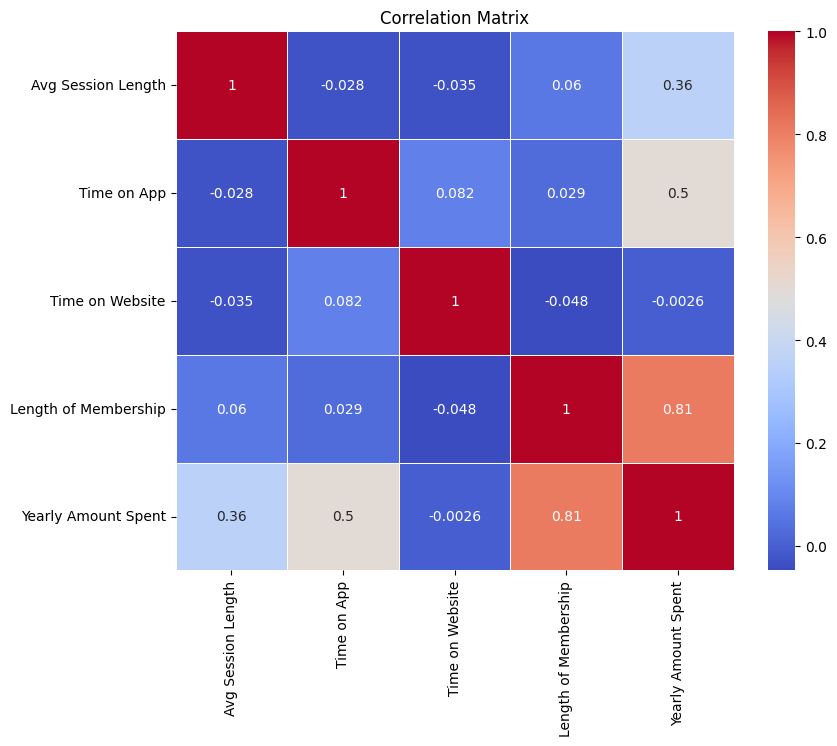

In [14]:
    # Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They have asked to help them figure it out

The 'Time on Website' appears to have little influence on the 'Yearly Amount Spent', whereas the 'Time on App' shows a stronger correlation.
The most important variable is 'Length of Membership'.

## Variable selection based on correlation value

0.3 fixed based on so many trials to get the best outcome; below this value, 
there is little improvement in model accuracy; after some stage, accuracy is reduced.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

dependent_variable = 'Yearly Amount Spent'

# correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Filter columns with correlation greater than ---- with respect to 'Yearly Amount Spent'
significant_correlations = corr_matrix[abs(corr_matrix[dependent_variable]) > 0.3][[dependent_variable]]  # 0.3 fixed based on so much trails to get best outcome

significant_variables = significant_correlations.index.tolist()

print("length of significant_variables: ",len(significant_variables))
print(significant_variables)

# Plot
plt.figure(figsize=(2, 5))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm', linewidths=0.6)
plt.title('Correlation with {}'.format(dependent_variable))
plt.show()

# Correclation Plot of columns satisfied the conditions
corr_matrix = data[significant_variables].corr(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


NameError: name 'data' is not defined

## visualization

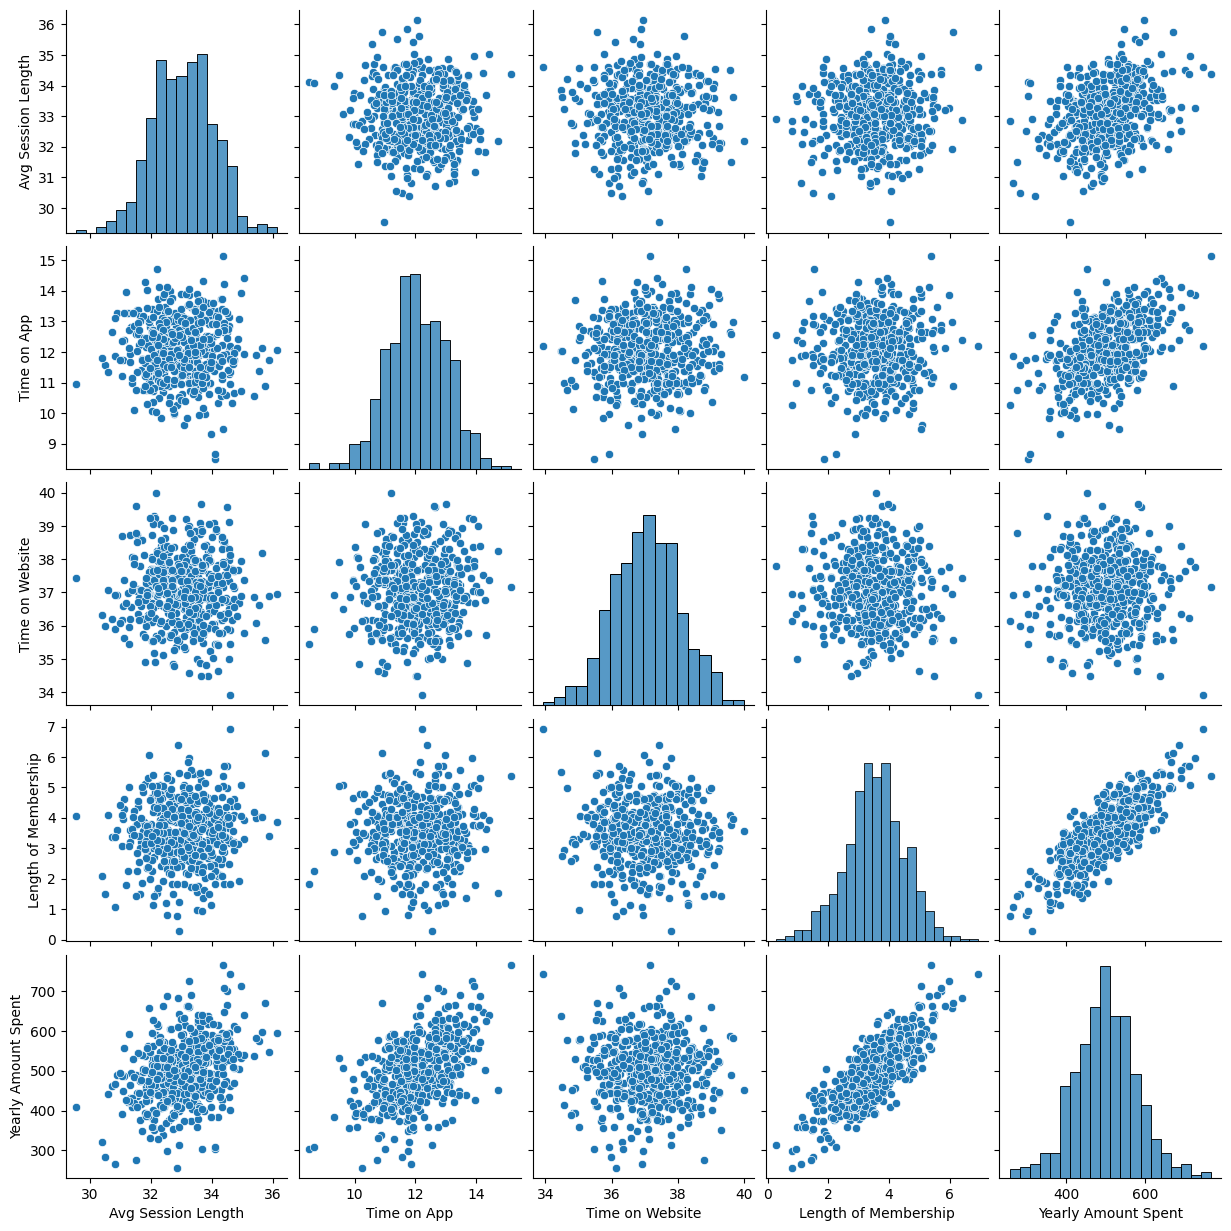

In [16]:
# relationship plot for numeric data
sns.pairplot(data= numeric_data)
plt.show()

### Detect outliers and handle them

In [17]:
data_filtered=data
data_filtered.shape

(500, 5)

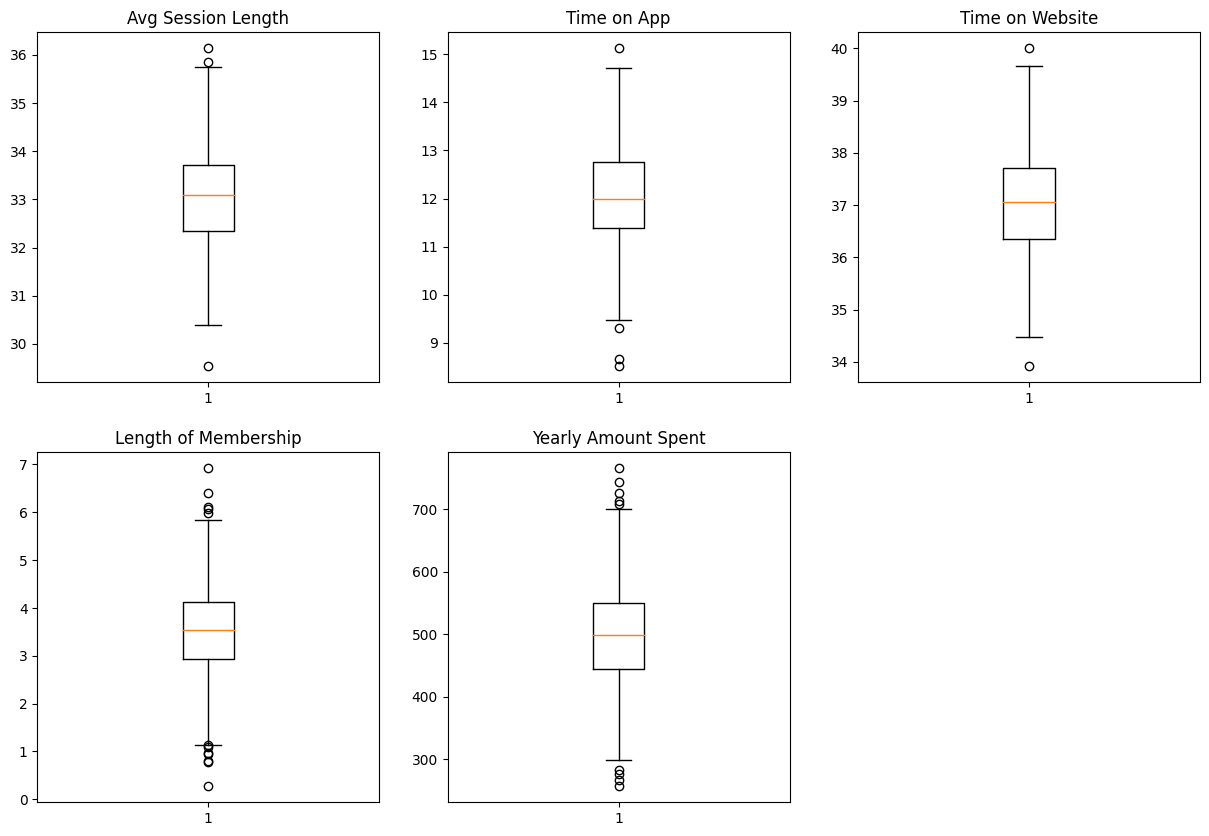

In [18]:
# display boxplots

num_columns = len(numeric_data.columns)
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR

In [19]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # # Changing the outliers
    new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: Avg Session Length
     Avg Session Length  Time on App  Time on Website  Length of Membership  \
154           36.139662    12.050267        36.959643              3.864861   
390           35.860237    11.730661        36.882149              3.416210   

     Yearly Amount Spent  
154           595.803819  
390           546.556667  


Column Name: Time on App
     Avg Session Length  Time on App  Time on Website  Length of Membership  \
362           33.981006     9.316289        36.914952              2.868428   
442           34.083663     8.668350        35.906756              2.252446   

     Yearly Amount Spent  
362           384.326057  
442           308.527747  


Column Name: Time on Website
     Avg Session Length  Time on App  Time on Website  Length of Membership  \
69            32.179100    11.187539        40.005182              3.552650   
157           34.603311    12.207298        33.913847              6.922689   

     Yearly Amount Spent  
69   

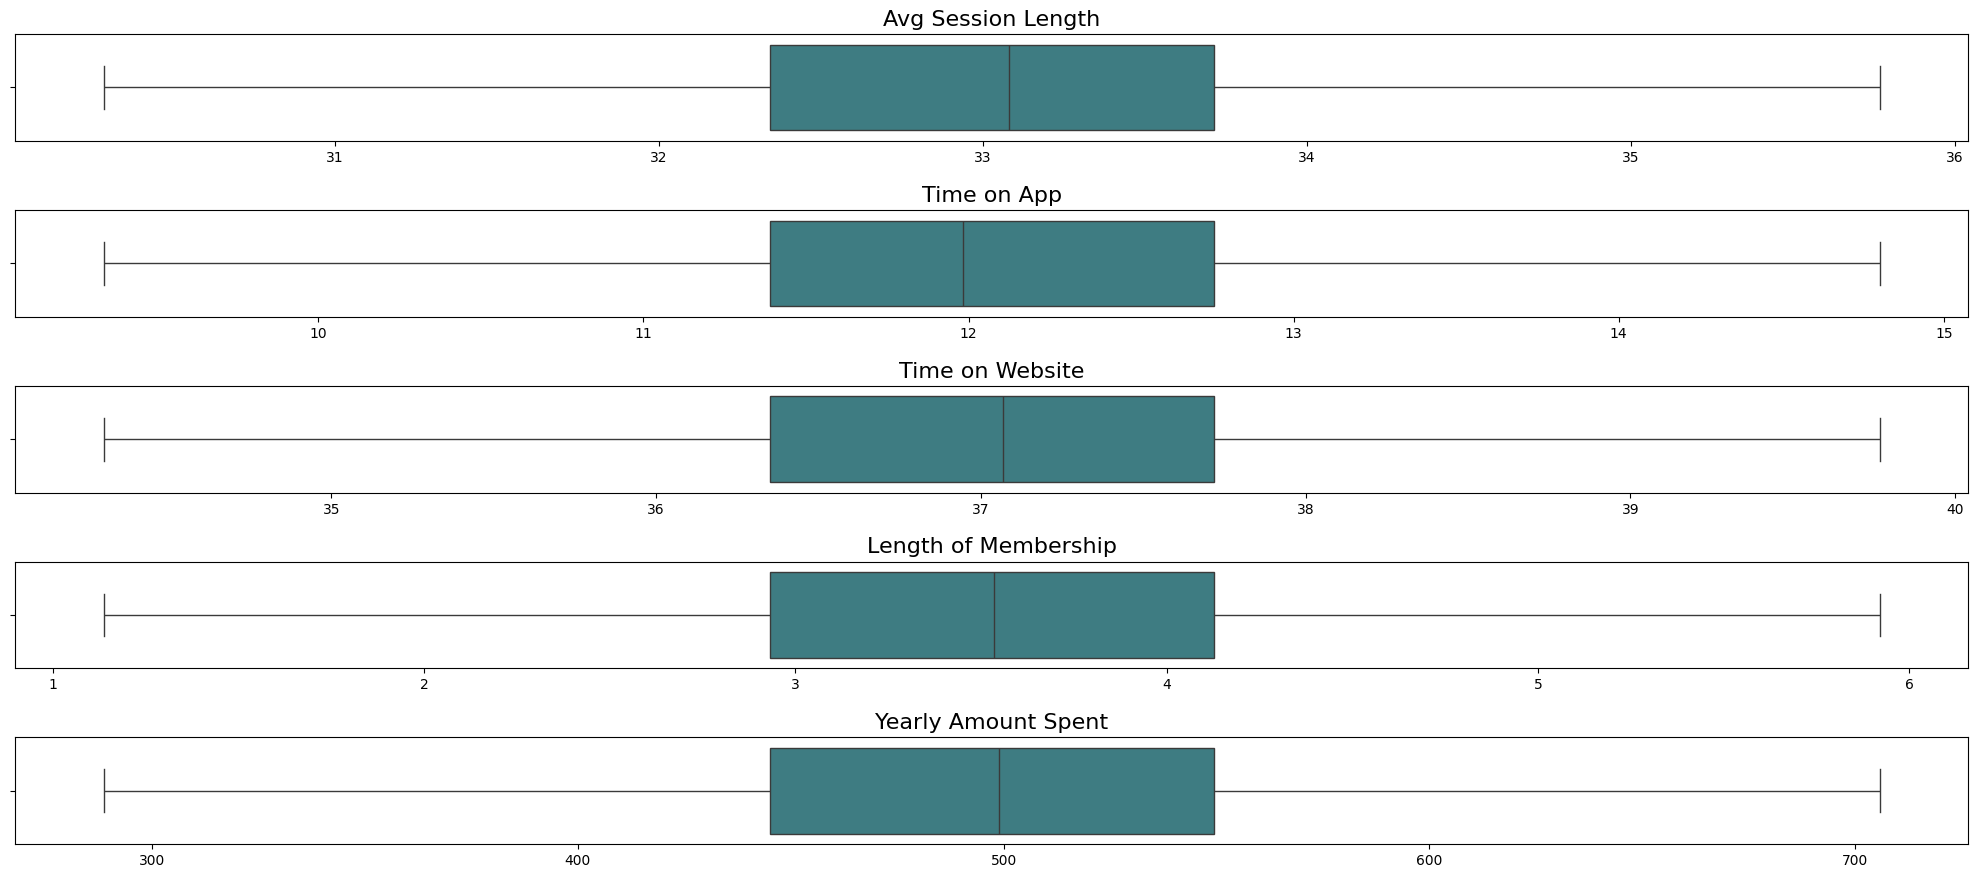

In [20]:
# display boxplots of Treated outliers with IQR

# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(new_data.columns), 1, figsize=(20, 9), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(new_data):
    sns.boxplot(x=variable, data=new_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()


#### Treating outliers with Cooks distance

Potential outliers: [ 16  75  82  96 120 148 166 169 193 197 200 242 244 260 284 286 303 309
 338 340 368 386 396 418 432 460 472 479 493]
Shape: (29,)


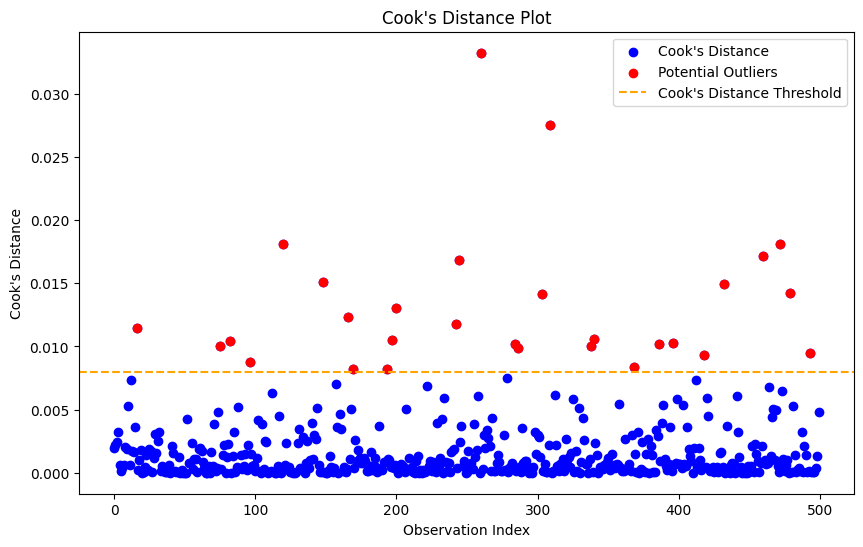

In [21]:
import numpy as np
import statsmodels.api as sm

X=data.drop('Yearly Amount Spent', axis=1)
y=data['Yearly Amount Spent']

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Get Cook's distance for each observation
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Set a threshold for Cook's distance to identify outliers
threshold = 4 / len(y)  # You can adjust the threshold as needed

# Identify potential outliers based on Cook's distance
outliers = np.where(cooks_distance > threshold)[0]

# Print the indices of potential outliers
print("Potential outliers:", outliers)
print("Shape:",outliers.shape)
# Plot Cook's distance values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cooks_distance)), cooks_distance, color='blue', label='Cook\'s Distance')

# Highlight potential outliers
plt.scatter(outliers, cooks_distance[outliers], color='red', label='Potential Outliers')

# Add a horizontal line at the threshold for better visualization
plt.axhline(y=threshold, color='orange', linestyle='--', label='Cook\'s Distance Threshold')

plt.title('Cook\'s Distance Plot')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.legend()
plt.show()
data_cleaned = data.drop(index=outliers)

## Distribution plots

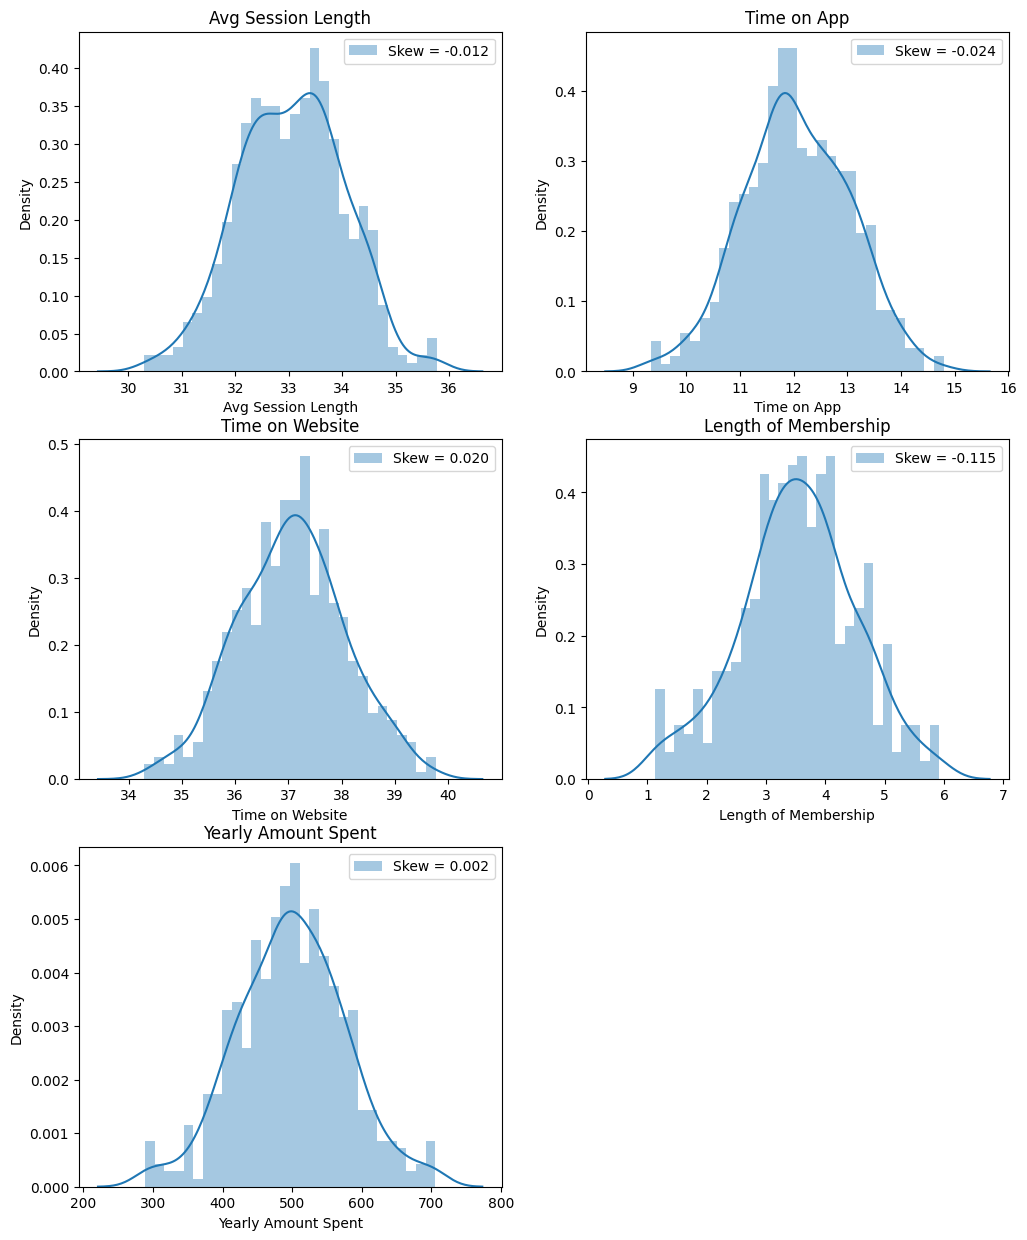

In [22]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    skew = new_data[column].skew()
    sns.distplot(new_data[column], kde= True, label='Skew = %.3f' %(skew), bins=30, ax=ax)
    ax.legend(loc='best')
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


### Histogram & Probability Plot (Q-Q plot)

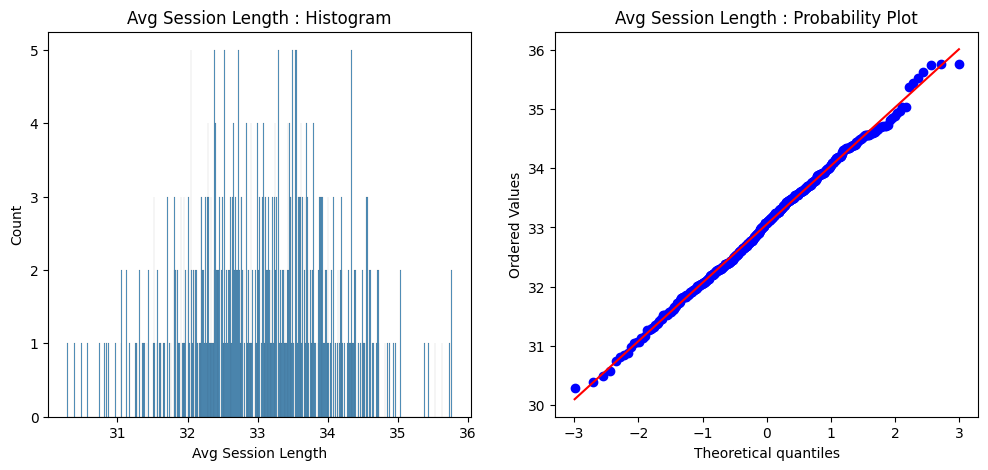

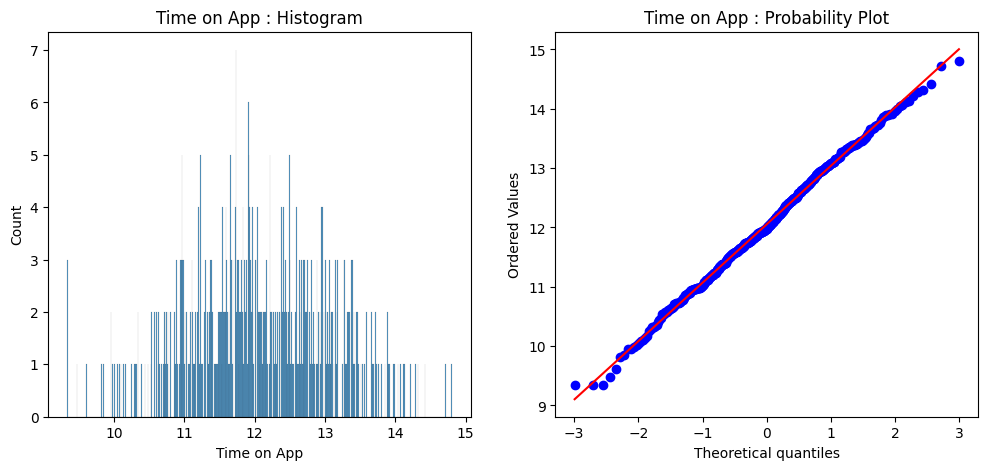

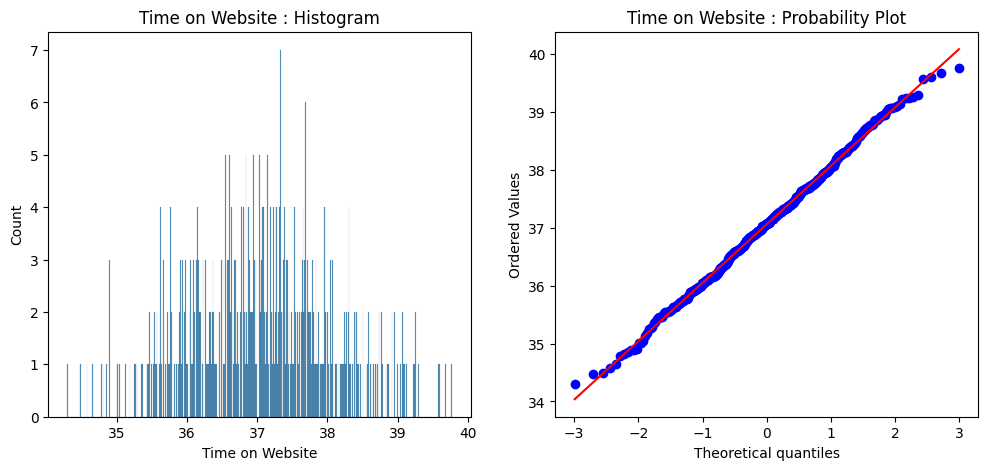

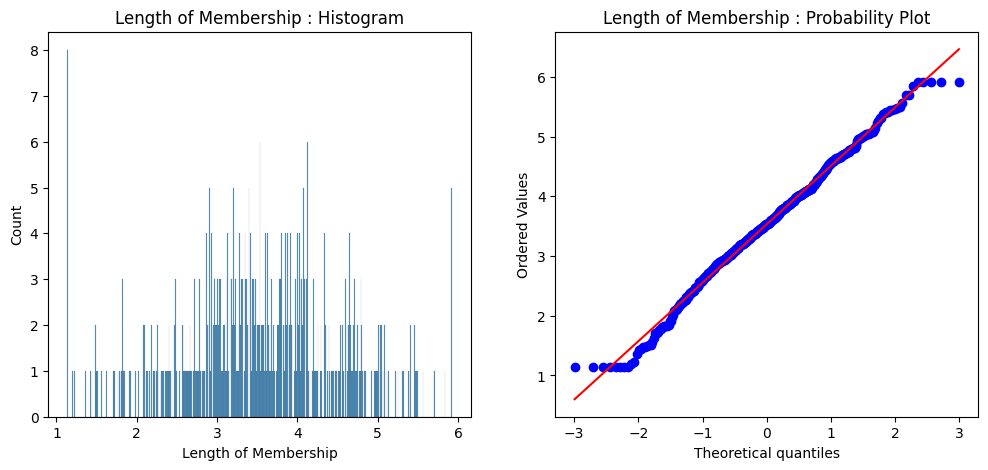

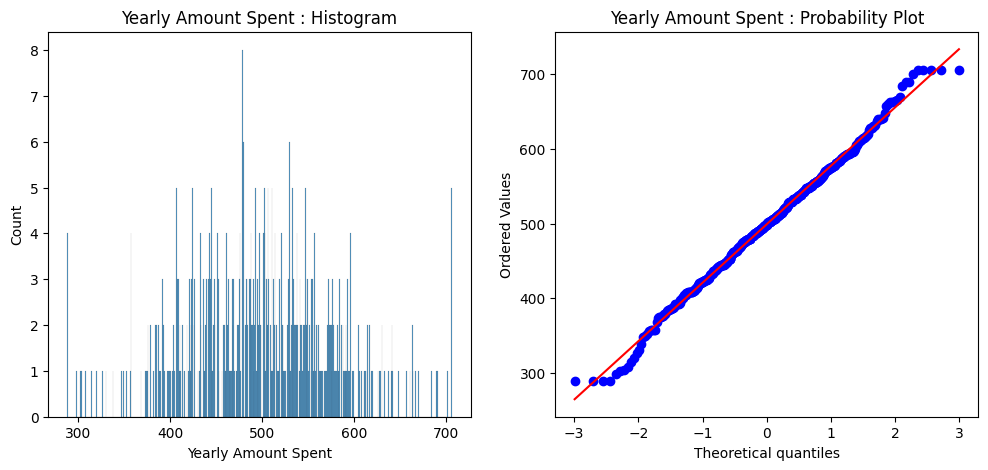

In [23]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    # sns.barplot(x = df[feature].value_counts().index.tolist(), y = df[feature].value_counts().tolist())
    sns.histplot(df[feature], bins=len(df[feature].value_counts()))
    # df[feature].hist()
    plt.title(f'{feature} : Histogram')
    
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


# Feature Engineering

### check the accuracy  (raw data)

In [24]:
X = data[['Time on Website','Time on App','Avg Session Length','Length of Membership']]
y= data['Yearly Amount Spent']
X = sm.add_constant(X)
raw_model = sm.OLS(y, X).fit()
mse = raw_model.mse_model
print("Mean Squared Error (MSE):", mse)
raw_model.summary()

Mean Squared Error (MSE): 772472.7347389573


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                         11:42:17   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Avg Session Length      25.7343      0.451     57.057      0.000      24.848      26.620
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# import statsmodels.formula.api as smf
# #data As per suggestions features, ['Avg Session Length', 'Time on App', 'Length of Membership', 'Yearly Amount Spent'] ---, 'Time on Website'
# dataset=data.rename({'Yearly Amount Spent':'YAmountSpent', 'Avg Session Length':'ASessionLength', 'Time on App':'TimeApp', 
#                      'Time on Website':'TimeWebsite', 'Length of Membership':'LengthMembership'},axis=1)
# model = smf.ols("YAmountSpent~ASessionLength+TimeApp+TimeWebsite+LengthMembership", data = dataset).fit()
# model.summary()

### check the accuracy  (Outlier treated data-using IQR values)
new_data

In [26]:
X = new_data[['Time on Website','Time on App','Avg Session Length','Length of Membership']]
y= new_data['Yearly Amount Spent']
X = sm.add_constant(X)
new_model = sm.OLS(y, X).fit()
mse = new_model.mse_model
print("Mean Squared Error (MSE):", mse)
new_model.summary()

Mean Squared Error (MSE): 747684.0830209586


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.981
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     6449.
Date:                 Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                         11:42:17   Log-Likelihood:                -1895.2
No. Observations:                  500   AIC:                             3800.
Df Residuals:                      495   BIC:                             3822.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1045.6373     24.950    -41.910      0.000   -1094.658    -996.617
Time on Website          0.4034      0.481      0.839      0.402      -0.541       1.348
Time on App             38.6375      0.492     78.469      0.000      37.670      39.605
Avg Session Length      25.5552      0.491     52.093      0.000      24.591      26.519
Length of Membership    62.0960      0.494    125.656      0.000      61.125      63.067
==============================================================================
Omnibus:                       34.567   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.700
Skew:                          -0.436   Prob(JB):                     8.92e-15
Kurtosis:                       4.532   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking accuracy with Cooks distance (Outlier Treatment)

In [27]:
# Refit the model with the cleaned data
X_cleaned = data_cleaned[['Time on Website','Time on App','Avg Session Length','Length of Membership']]
y_cleaned= data_cleaned['Yearly Amount Spent']
X_cleaned = sm.add_constant(X_cleaned)
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()
mse = model_cleaned.mse_model
print("Mean Squared Error (MSE):", mse)

# Print the summary of the cleaned model
print(model_cleaned.summary())

Mean Squared Error (MSE): 692889.8858028379
                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.987
Model:                             OLS   Adj. R-squared:                  0.987
Method:                  Least Squares   F-statistic:                     9064.
Date:                 Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                         11:42:17   Log-Likelihood:                -1687.1
No. Observations:                  471   AIC:                             3384.
Df Residuals:                      466   BIC:                             3405.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Note:

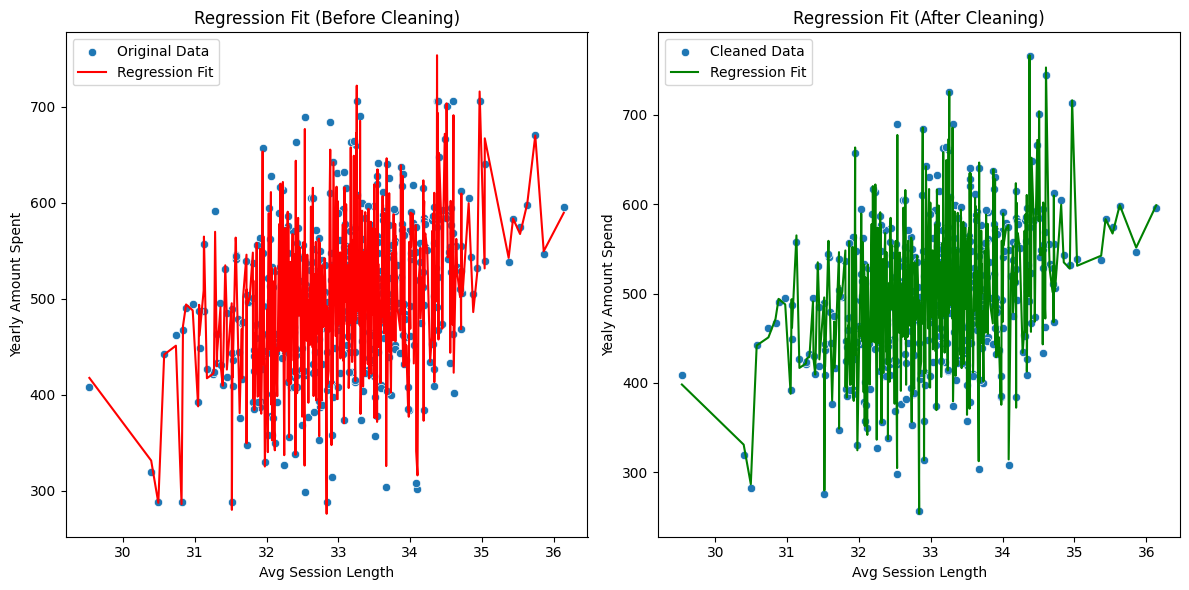

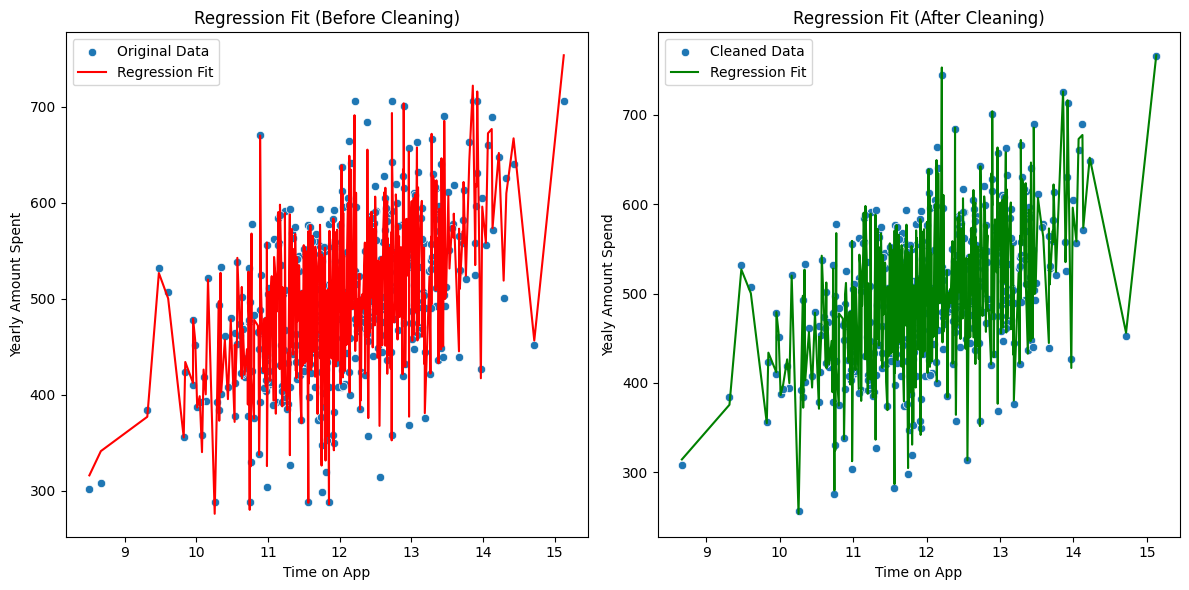

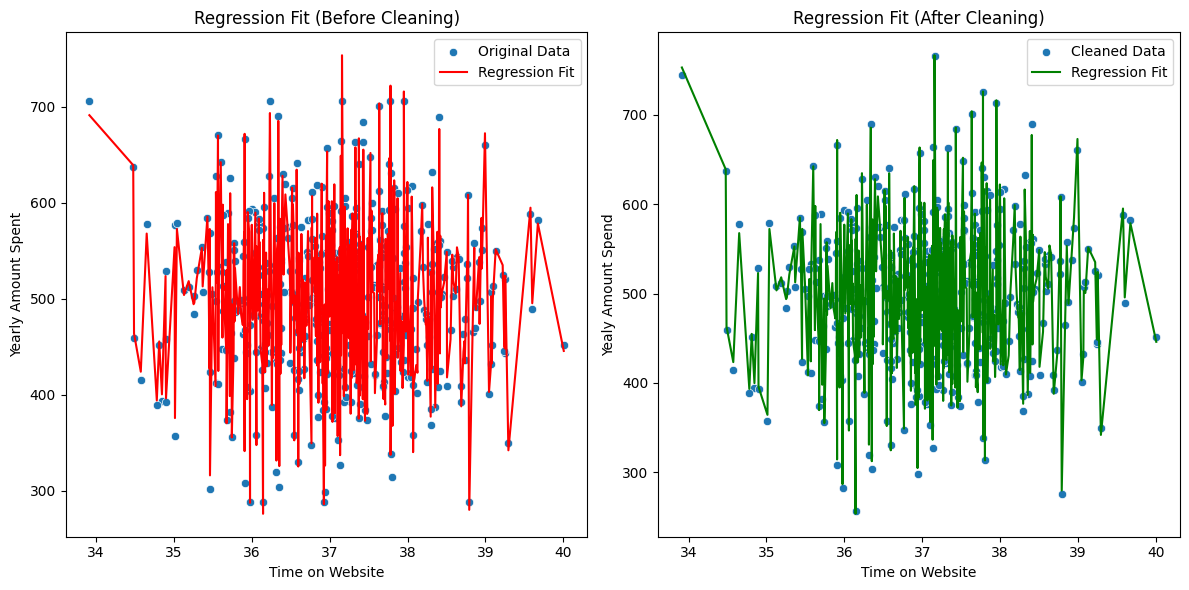

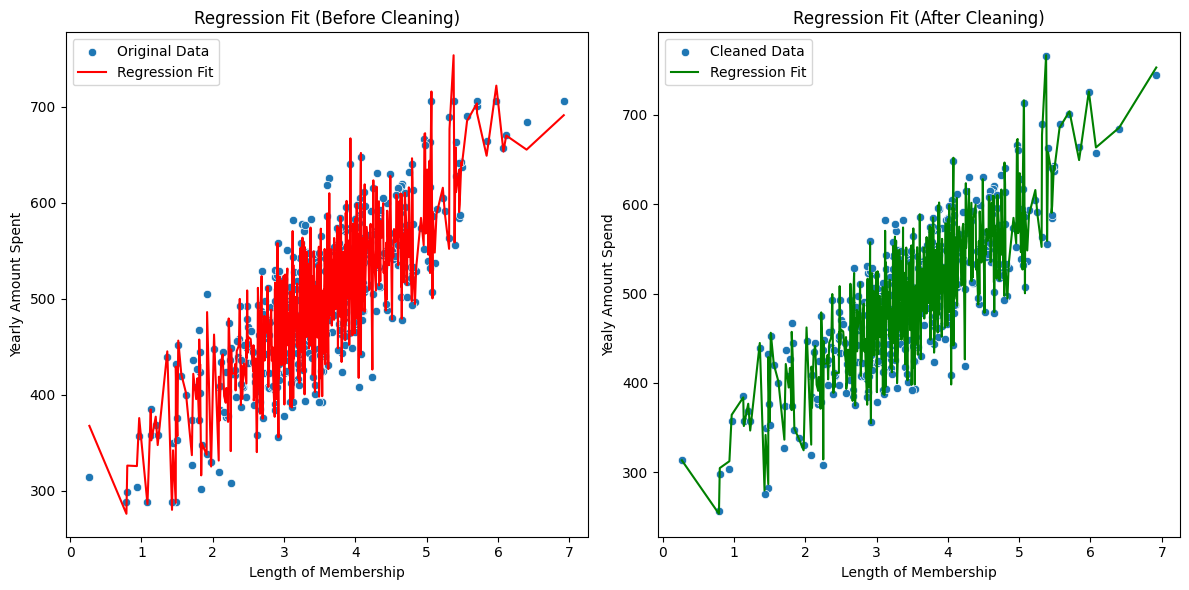

In [28]:
# Visualize the best model's predictions
for i, column in enumerate(data.columns[:-1]):
    
    plt.figure(figsize=(12, 6))

    # Plot the original data and regression line
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=data[column], y=y, label='Original Data')
    sns.lineplot(x=data[column], y=raw_model.predict(X), color='red', label='Regression Fit')
    plt.title('Regression Fit (Before Cleaning)')
    plt.xlabel(column)
    plt.ylabel('Yearly Amount Spent')
    plt.legend()
    # plt.tight_layout()
    # plt.show()
    
    # # Plot the cleaned data and regression line
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data_cleaned[column], y=y_cleaned, label='Cleaned Data')
    sns.lineplot(x=data_cleaned[column], y=model_cleaned.predict(X_cleaned), color='green', label='Regression Fit')
    plt.title('Regression Fit (After Cleaning)')
    plt.xlabel(column)
    plt.ylabel('Yealy Amount Spend')
    plt.legend()

    plt.tight_layout()
    plt.show()
    

Note: Getting More accuracy with Raw data, .........................

................................

### check accuracy: Without considering low correlation features

In [29]:
# by corr condition - 0.3
corr_matrix = data.corr(numeric_only=True)
significant_correlations1 = corr_matrix[abs(corr_matrix[dependent_variable]) >= 0.3][[dependent_variable]]  
significant_variables1 = significant_correlations1.index.tolist()
print(significant_variables1)

data_signf=data[significant_variables1]
regression_model = linear_model.LinearRegression()
X=data_signf.drop('Yearly Amount Spent', axis=1)
y= data_signf['Yearly Amount Spent']
regression_model.fit(X = X, y = y)
score=regression_model.score(X = X, y = y)
print("score:",score)

['Avg Session Length', 'Time on App', 'Length of Membership', 'Yearly Amount Spent']
score: 0.9842848920844948


Note: with out the variable 'Time on Website', getting same accuracy

### Check accuracy: without normalization (Based on Sklearn LR (data: data))

In [30]:
# Initialize model
regression_model = linear_model.LinearRegression()

X=data.drop('Yearly Amount Spent', axis=1)
y=data['Yearly Amount Spent']

# Train the model using the mtcars data
regression_model.fit(X = X, y = y)

# Check trained model y-intercept
print("y-intercept:",regression_model.intercept_)

# Check trained model coefficients
print("model coefficients:",regression_model.coef_)

# Check regression_model.score
score1=regression_model.score(X = X, y = y)
print("score:",score1)

y-intercept: -1051.5942553006241
model coefficients: [25.73427108 38.70915381  0.43673884 61.57732375]
score: 0.9843155370226726


In [31]:
# Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):
predictions = regression_model.predict(X=X)
# predictions = std2.inverse_transform(predictions.reshape(-1, 1))
mse1 = mean_squared_error(data['Yearly Amount Spent'], predictions)
rmse = np.sqrt(mse1)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 98.47102522148985
Root Mean Squared Error: 9.923256785022236


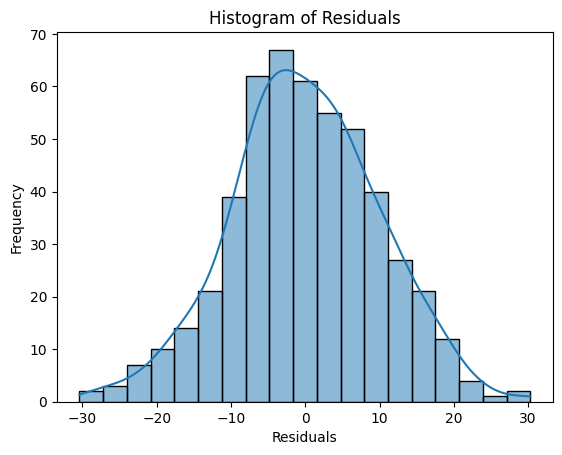

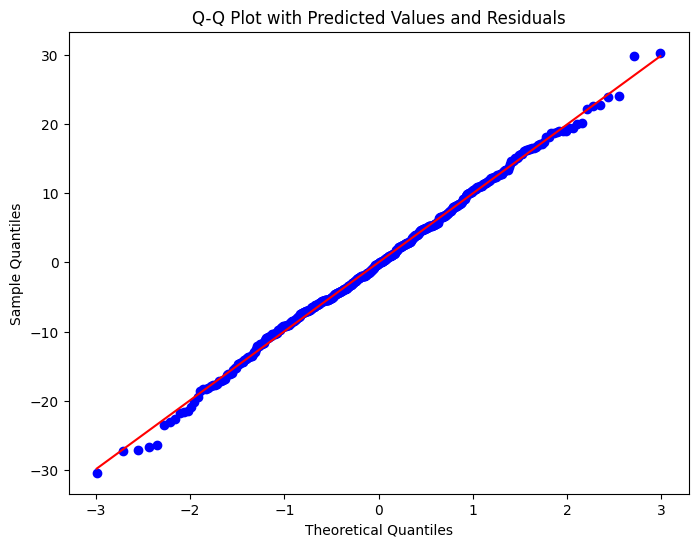

In [32]:
# Residual Analysis
residuals = data['Yearly Amount Spent'] - predictions

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Create a Q-Q plot with predicted values and residuals
pred = regression_model.predict(X=X)
residuals = y - pred
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot with Predicted Values and Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

### Check accuracy: standard Scalar Data

In [33]:
from sklearn.preprocessing import StandardScaler
std1 = StandardScaler()
std2 = StandardScaler()
data_norm=data.copy()
data_norm.iloc[:,:-1]= std1.fit_transform(data.iloc[:,:-1].values)
# new_data_norm.iloc[:,-1] = std2.fit_transform(new_data.iloc[:,-1].values.reshape(-1, 1))   #Scaling output data also
# print(new_data_norm.head())
data_norm.tail()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,0.186035,1.524003,-0.636429,0.213479,573.847438
496,1.663357,-0.359187,0.128603,0.043139,529.049004
497,-0.409872,-0.556854,1.260187,1.427261,551.620145
498,0.271597,0.341248,-0.218291,-1.199042,456.469510
499,0.668422,0.368821,-1.277323,-0.799679,497.778642


In [34]:
# Initialize model
regression_model = linear_model.LinearRegression()

X=data_norm.drop('Yearly Amount Spent', axis=1)
y=data_norm['Yearly Amount Spent']

# Train the model using the mtcars data
regression_model.fit(X = X, y = y)

# Check trained model y-intercept
print("y-intercept:",regression_model.intercept_)

# Check trained model coefficients
print("model coefficients:",regression_model.coef_)

# Check regression_model.score
score2=regression_model.score(X = X, y = y)
print("score:",score2)

y-intercept: 499.3140382585905
model coefficients: [25.5173325  38.4467404   0.44087821 61.47127066]
score: 0.9843155370226726


In [35]:
# Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):
predictions = regression_model.predict(X=X)
# predictions = std2.inverse_transform(predictions.reshape(-1, 1))
mse2 = mean_squared_error(data_norm['Yearly Amount Spent'], predictions)
rmse = np.sqrt(mse2)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 98.47102522148994
Root Mean Squared Error: 9.923256785022241


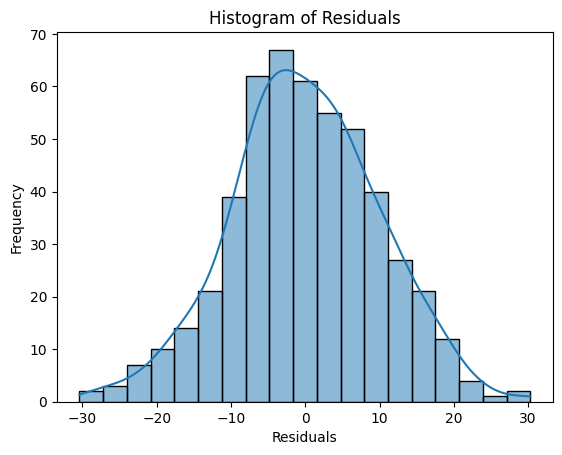

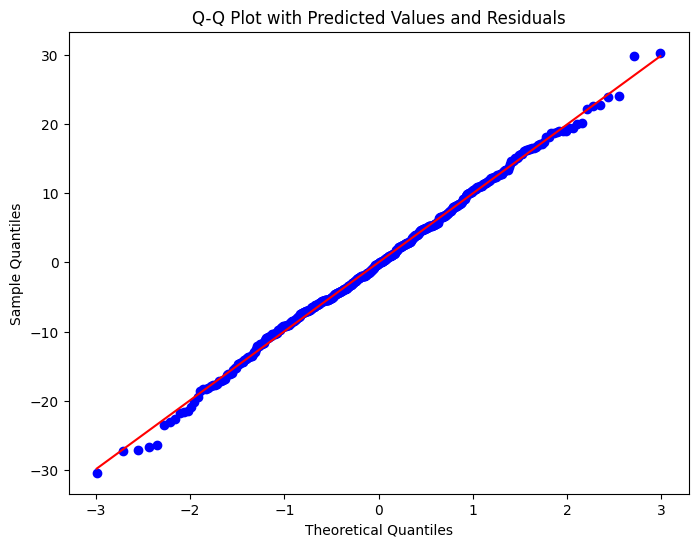

In [36]:
# Residual Analysis
residuals = data_norm['Yearly Amount Spent'] - predictions

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Create a Q-Q plot with predicted values and residuals
pred = regression_model.predict(X=X)
residuals = y - pred
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot with Predicted Values and Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#### Compare the accuracy with Standard Scalar data

In [37]:
# Compare both method score, mse
print(score1,score2)
print(mse1,mse2)

0.9843155370226726 0.9843155370226726
98.47102522148985 98.47102522148994


Note: Note much variation with standard scalar data and raw data

### Accuracy check: All Normalizing features with Train-Test split

In [38]:
# CustomScaler

#withoutNormalization
class withoutNormalization:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)

#Square
class SquareScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X ** 2 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)
    
    
#Log
class LogScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log(X + 1)
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)


scaler_name: without normalization
score: 0.9854085989105928
mse: 103.9155413650334

scaler_name: Standard Scaler
score: 0.9854085989105928
mse: 103.91554136503328

scaler_name: MinMax Scaler
score: 0.9854085989105928
mse: 103.9155413650332

scaler_name: Square Transformation
score: 0.9557842998004723
mse: 262.02835584352465

scaler_name: Log Transformation
score: 0.959823574744322
mse: 204.35848699910503

 best_scaler: MinMax Scaler


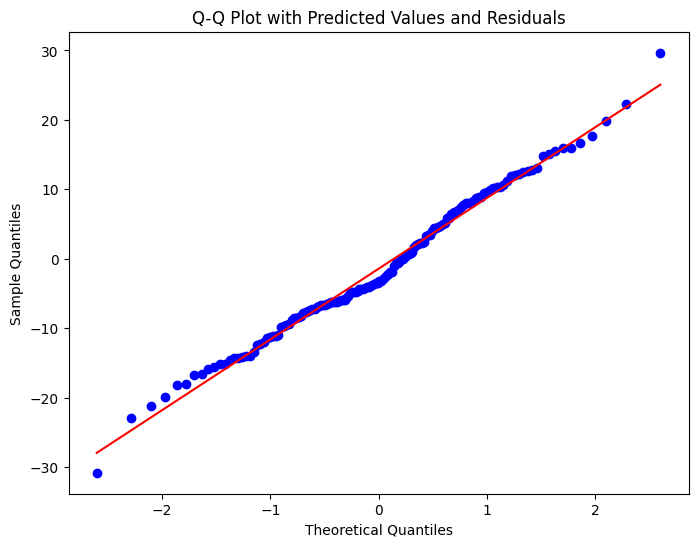

In [39]:
# Normalization to input data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
# X_train = X
# X_test = X
# y_train= y
# y_test = y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


results = {}

scalers = {
    'without normalization': withoutNormalization(),
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    # 'Robust Scaler': RobustScaler(),
    # 'Log Transformation2': PowerTransformer(method='box-cox'),
    'Square Transformation': SquareScaler(),
    'Log Transformation': LogScaler(),
}

for scaler_name, scaler in scalers.items():
    print("\nscaler_name:",scaler_name)
 
    X_train_scaled =X_train.copy()   
    X_train_scaled= scaler.fit_transform(X_train_scaled)
    
    X_test_scaled =X_test.copy()
    X_test_scaled = scaler.transform(X_test_scaled) 
    
    regression_model = LinearRegression()
    regression_model.fit(X_train_scaled, y_train)
    
    # Check regression_model.score
    score=regression_model.score(X = X_train_scaled, 
                       y = y_train)
    print("score:",score)
    
    predictions = regression_model.predict(X_test_scaled)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    print("mse:",mse)

    results[scaler_name] = {'model': regression_model, 'predictions': predictions, 'mse': mse}
    
# Choose the best model based on mse
best_scaler = min(results, key=lambda x: results[x]['mse']); print("\n best_scaler:", best_scaler)
best_model = results[best_scaler]['model']   
best_predictions = results[best_scaler]['predictions']

# Create a Q-Q plot with predicted values and residuals
residuals = y_test - best_predictions
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot with Predicted Values and Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

The best model is obtained using the ___MAX_MIN___ normalization.  but not much variation than without normalization

## Conclusion:

1. We can exclude the feature "Time on website".

2. Without outlier treatment, the model is showing higher accuracy compared to IQR treatment.

3. Normalization does not lead to improvement in accuracy.

New :

1. With Cooks distance outlier treatment, the model shows higher accuracy.

In [40]:
df_cleaned=data_cleaned.copy()
df_cleaned.drop('Time on Website', axis=1, inplace=True)
df_cleaned.head()

,Avg Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


# AUTO ML

Pycaret

H2O

Auto Sklearn



## using pycaret

In [41]:
import pycaret
from pycaret.regression import *

In [42]:
reg_experiment= setup(data= df_cleaned,target='Yearly Amount Spent',verbose= True, experiment_name='adv1',fold=5)
best_model= compare_models()

,Description,Value
0,Session id,5831
1,Target,Yearly Amount Spent
2,Target type,Regression
3,Original data shape,"(471, 4)"
4,Transformed data shape,"(471, 4)"
5,Transformed train set shape,"(329, 4)"
6,Transformed test set shape,"(142, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,7.0020,74.3491,8.6146,0.9867,0.0177,0.0143,0.9480
lar,Least Angle Regression,7.0020,74.3491,8.6146,0.9867,0.0177,0.0143,0.0080
br,Bayesian Ridge,7.0017,74.3506,8.6147,0.9867,0.0177,0.0143,0.0100
ridge,Ridge Regression,6.9996,74.4749,8.6227,0.9866,0.0177,0.0143,0.5880
huber,Huber Regressor,7.0162,74.5198,8.6250,0.9866,0.0177,0.0143,0.0100
lasso,Lasso Regression,7.1359,77.7563,8.8137,0.9861,0.0183,0.0146,0.7880
llar,Lasso Least Angle Regression,7.1359,77.7563,8.8137,0.9861,0.0183,0.0146,0.0100
et,Extra Trees Regressor,11.7170,245.1971,15.4771,0.9583,0.0336,0.0245,0.0340
gbr,Gradient Boosting Regressor,12.8841,287.8301,16.7718,0.9503,0.0361,0.0268,0.0220
rf,Random Forest Regressor,14.4260,373.0027,18.9693,0.9367,0.0409,0.0302,0.0520


In [43]:
lr= create_model('lr')
tuned_lr= tune_model(lr)
q=predict_model(tuned_lr, data=df_cleaned)
print(q)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.0982,75.6988,8.7005,0.9883,0.0176,0.0141
1,6.8813,73.3707,8.5657,0.9869,0.0181,0.0142
2,6.4392,63.0153,7.9382,0.9906,0.0168,0.0135
3,7.1879,78.2406,8.8454,0.9870,0.0187,0.0152
4,7.4033,81.4201,9.0233,0.9804,0.0174,0.0143
Mean,7.0020,74.3491,8.6146,0.9867,0.0177,0.0143
Std,0.3275,6.2670,0.3708,0.0034,0.0007,0.0005


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.0982,75.6988,8.7005,0.9883,0.0176,0.0141
1,6.8813,73.3707,8.5657,0.9869,0.0181,0.0142
2,6.4392,63.0153,7.9382,0.9906,0.0168,0.0135
3,7.1879,78.2406,8.8454,0.9870,0.0187,0.0152
4,7.4033,81.4201,9.0233,0.9804,0.0174,0.0143
Mean,7.0020,74.3491,8.6146,0.9867,0.0177,0.0143
Std,0.3275,6.2670,0.3708,0.0034,0.0007,0.0005


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,7.1122,76.3847,8.7398,0.9872,0.0181,0.0146


     Avg Session Length  Time on App  Length of Membership  \
0             34.497269    12.655651              4.082621   
1             31.926271    11.109461              2.664034   
2             33.000916    11.330278              4.104543   
3             34.305557    13.717514              3.120179   
4             33.330673    12.795189              4.446308   
..                  ...          ...                   ...   
495           33.237659    13.566159              3.746573   
496           34.702530    11.695736              3.576526   
497           32.646778    11.499409              4.958264   
498           33.322502    12.391423              2.336485   
499           33.715981    12.418808              2.735160   

     Yearly Amount Spent  prediction_label  
0             587.951050        593.862061  
1             392.204926        379.743286  
2             487.547516        505.432861  
3             581.852356        570.509399  
4             599.406067      

In [44]:
br= create_model('br')
tuned_br= tune_model(br)
q=predict_model(tuned_br, data=df_cleaned)
print(q)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.0980,75.6887,8.6999,0.9883,0.0176,0.0141
1,6.8806,73.3824,8.5664,0.9869,0.0181,0.0142
2,6.4388,63.0355,7.9395,0.9906,0.0168,0.0135
3,7.1882,78.2390,8.8453,0.9871,0.0187,0.0152
4,7.4031,81.4075,9.0226,0.9804,0.0174,0.0143
Mean,7.0017,74.3506,8.6147,0.9867,0.0177,0.0143
Std,0.3276,6.2558,0.3702,0.0034,0.0007,0.0005


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.0980,75.6888,8.6999,0.9883,0.0176,0.0141
1,6.8806,73.3826,8.5664,0.9869,0.0181,0.0142
2,6.4388,63.0355,7.9395,0.9906,0.0168,0.0135
3,7.1882,78.2392,8.8453,0.9871,0.0187,0.0152
4,7.4031,81.4072,9.0226,0.9804,0.0174,0.0143
Mean,7.0017,74.3506,8.6147,0.9867,0.0177,0.0143
Std,0.3276,6.2558,0.3702,0.0034,0.0007,0.0005


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,7.1117,76.3769,8.7394,0.9872,0.0181,0.0146


     Avg Session Length  Time on App  Length of Membership  \
0             34.497269    12.655651              4.082621   
1             31.926271    11.109461              2.664034   
2             33.000916    11.330278              4.104543   
3             34.305557    13.717514              3.120179   
4             33.330673    12.795189              4.446308   
..                  ...          ...                   ...   
495           33.237659    13.566159              3.746573   
496           34.702530    11.695736              3.576526   
497           32.646778    11.499409              4.958264   
498           33.322502    12.391423              2.336485   
499           33.715981    12.418808              2.735160   

     Yearly Amount Spent  prediction_label  
0             587.951050        593.851685  
1             392.204926        379.756958  
2             487.547516        505.432739  
3             581.852356        570.500854  
4             599.406067      

In [45]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [46]:
evaluate_model(tuned_br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Manual ML

In [47]:
# Train -Test split
X_cleaned = df_cleaned[['Avg Session Length','Time on App','Length of Membership']]
y_cleaned= df_cleaned['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=100)

# Linear Regression

In [48]:
from sklearn.metrics import r2_score

In [49]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared value: {r_squared}')
print(f'Mean Squared Error: {mse}')

R-squared value: 0.9882998347488763
Mean Squared Error: 68.39396760288521


# Bagging Regressor

In [50]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

base_regressor = RandomForestRegressor(random_state=100)

# Instantiate the BaggingRegressor
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=10, random_state=100)

# Train the BaggingRegressor
bagging_regressor.fit(X_train_scaled, y_train)

# Make predictions
predictions = bagging_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared value: {r_squared}')
print("Mean Squared Error:", mse)

R-squared value: 0.9882998347488763
Mean Squared Error: 295.3321534608596


# Ridge Regressor

In [51]:
from sklearn.linear_model import Ridge

# Create a Ridge model
ridge_model = Ridge(alpha=1.0) 

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared value: {r_squared}')
print("Ridge Model Mean Squared Error:", mse)

R-squared value: 0.9882998347488763
Ridge Model Mean Squared Error: 68.66037202183814


# GB regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=100)

# Train the model
gradient_boosting_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = gradient_boosting_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared value: {r_squared}')
print("Gradient Boosting Mean Squared Error:", mse)

R-squared value: 0.9882998347488763
Gradient Boosting Mean Squared Error: 178.9702662429623


# Lasso Regressor

In [53]:
from sklearn.linear_model import Lasso
alpha=1
lasso_reg= Lasso(alpha= alpha)

# Train the model on the training data
lasso_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared value: {r_squared}')
print(f'Mean Squared Error: {mse}')
print(f'Intercept: {lasso_reg.intercept_}')
print(f'Coefficient: {lasso_reg.coef_}')

R-squared value: 0.987409650565665
Mean Squared Error: 73.59758882364584
Intercept: 497.5051799795066
Coefficient: [23.24357846 36.21844344 60.15220347]


# XGboost

In [54]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define hyperparameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 3,
    'alpha': 10,  
    'n_estimators': 100  
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared value: {r_squared}')
print(f'Mean Squared Error: {mse}')


R-squared value: 0.9670662111778587
Mean Squared Error: 192.5162967698645


# SVR

In [55]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='linear', C=1.0, epsilon=0.2)  

# Train the model on the training data
svr_reg.fit(X_train_scaled, y_train.ravel())

# Make predictions on the test set
y_pred = svr_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared value: {r_squared}')
print(f'Mean Squared Error: {mse}')
print(f'Intercept: {svr_reg.intercept_}')
print(f'Coefficient: {svr_reg.coef_}')

R-squared value: 0.9869082284351609
Mean Squared Error: 76.52867981364447
Intercept: [497.76255867]
Coefficient: [[23.80338294 36.3655791  58.72990393]]


# K-Neighbors

In [56]:
from sklearn.neighbors import KNeighborsRegressor
k_value = 5 
knn_reg = KNeighborsRegressor(n_neighbors=k_value)

# Train the model on the training data
knn_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared value: {r_squared}')
print(f'Mean Squared Error: {mse}')

R-squared value: 0.9558183070834207
Mean Squared Error: 258.26654659317086


# Elastic net

In [57]:
from sklearn.linear_model import ElasticNet
alpha = 0.5  
l1_ratio = 0.5  
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Train the model on the training data
elastic_net.fit(X_train_scaled, y_train.ravel())

# Make predictions on the test set
y_pred = elastic_net.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared value: {r_squared}')
print(f'Mean Squared Error: {mse}')

# You can also access the learned coefficients and intercept
print(f'Intercept: {elastic_net.intercept_}')
print(f'Coefficient: {elastic_net.coef_}')

R-squared value: 0.9469098434432505
Mean Squared Error: 310.34146694857105
Intercept: 497.5051799795066
Coefficient: [19.57470183 29.7086885  48.95418748]


From the model fitting, we chose linear regression with least mse and high r2 values

# Visualize the best model's predictions

In [58]:
best_model=lr
best_model.feature_names_in_

array(['Avg Session Length', 'Time on App', 'Length of Membership'],
      dtype=object)

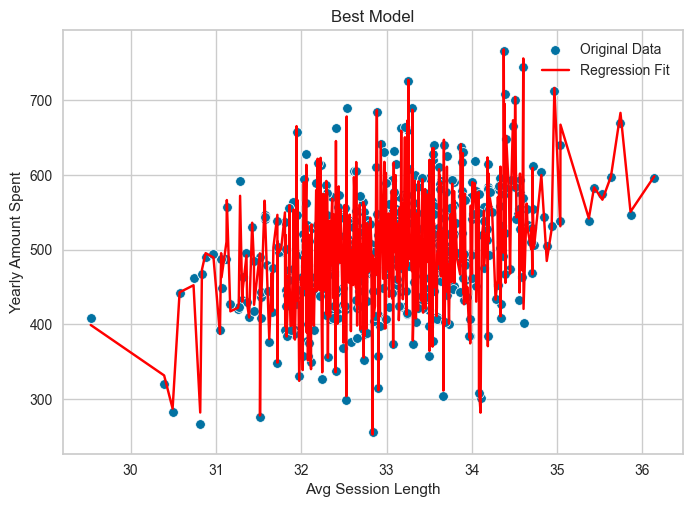

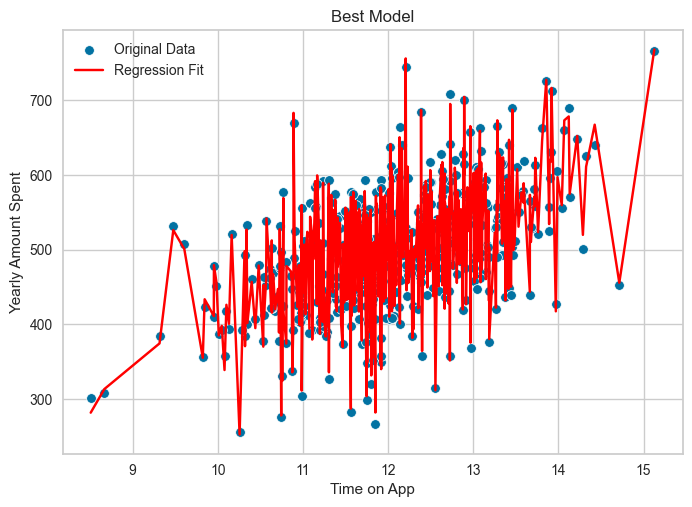

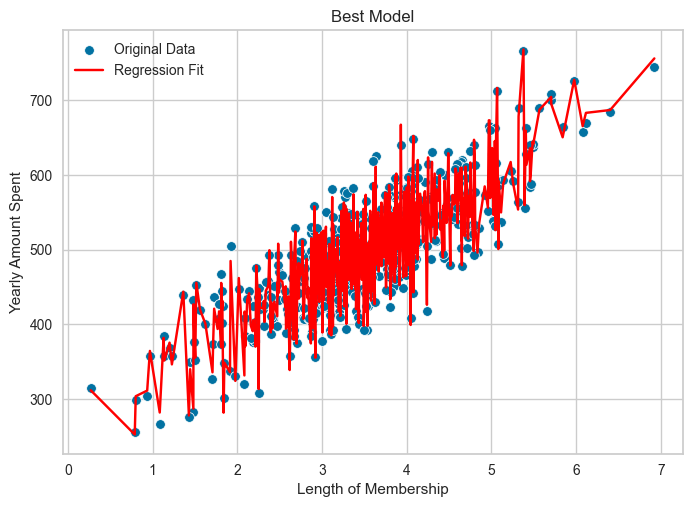

In [59]:
X=data[['Avg Session Length','Time on App','Length of Membership']]
y=data['Yearly Amount Spent']

# Visualize the best model's predictions
for i, column in enumerate(X.columns):

    # plt.scatter(X_test[column], y_test, label='Actual Data')
    # plt.plot(X_test[column], best_predictions, label='Best Model Predictions', color='red')
    
    sns.scatterplot(x=X[column], y=y, label='Original Data')
    sns.lineplot(x=X[column], y=best_model.predict(X), color='red', label='Regression Fit')
    plt.xlabel(column)
    plt.ylabel('Yearly Amount Spent')
    plt.legend()
    plt.title(f'Best Model')
    plt.show()

# Deployment

Using pickle

In [60]:
import pickle
# Save the trained model
filename = 'finalized_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))


In [61]:
# Loading the model
loaded_model = pickle.load(open(filename, 'rb'))
# loaded_model = pickle.load(open('model.pkl', 'rb'))

In [62]:
X_test.iloc[:5,:]

,Avg Session Length,Time on App,Length of Membership
438,32.149061,10.047315,3.535088
93,33.710653,13.664748,1.362674
365,32.030550,12.644202,5.038107
458,35.371876,10.572467,4.198349
492,33.680937,11.201570,2.208814


In [63]:
# Use the model for predictions
predictions = loaded_model.predict(X_test.iloc[:5,:])
print(y_test.iloc[:5,],predictions)

438    392.992256
93     439.074767
365    594.274483
458    537.915753
492    403.819520
Name: Yearly Amount Spent, dtype: float64 [398.17945079 443.81817749 590.30076279 541.89043515 399.54412044]


Using Web APP

In [64]:
from flask import Flask, request, jsonify, render_template
import pickle
import numpy as np

app = Flask(__name__)

# Load the trained model
with open('finalized_model.pkl', 'rb') as model_file:
	model = pickle.load(model_file)

@app.route('/')
def home():
	return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
	features = [float(x) for x in request.form.values()]
	final_features = np.array(features).reshape(1, -1)
	prediction = model.predict(final_features)
	return render_template('index.html', prediction_text='Yearly Amount spent will be: ₹{:.2f}'.format(prediction[0]))

if __name__ == '__main__':
	app.run(debug=False, host='0.0.0.0')


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.109:5000
Press CTRL+C to quit
